<a href="https://colab.research.google.com/github/eduardoguimaraes90/Tratamento_Dados_Categoricos_Impacto_Modelagem_Estatistica/blob/main/Projeto5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Carregando e identificando os tipos de dados

In [2]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [3]:
# Shape
df_dsa.shape

(400, 7)

In [4]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   valor_venda_unitario  400 non-null    float64
 1   valor_venda_total     400 non-null    int64  
 2   custo_entrega         400 non-null    int64  
 3   status_entrega        400 non-null    object 
 4   idade_vendedor        400 non-null    int64  
 5   area_urbana           400 non-null    object 
 6   cliente_local         400 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 22.0+ KB


In [5]:
# Amostra dos dados
df_dsa.head()

,valor_venda_unitario,valor_venda_total,custo_entrega,status_entrega,idade_vendedor,area_urbana,cliente_local
0,9.50,138,11,Ruim,42,Sim,Sim
1,11.22,111,16,Bom,65,Sim,Sim
2,10.06,113,10,Medio,59,Sim,Sim
3,7.40,117,4,Medio,55,Sim,Sim
4,4.15,141,3,Ruim,38,Sim,Nao


Análise exploratória de acordo com o tipo de variável

In [6]:
# Configuração de estilo
sns.set(style = 'darkgrid')

<Axes: xlabel='valor_venda_unitario', ylabel='Count'>

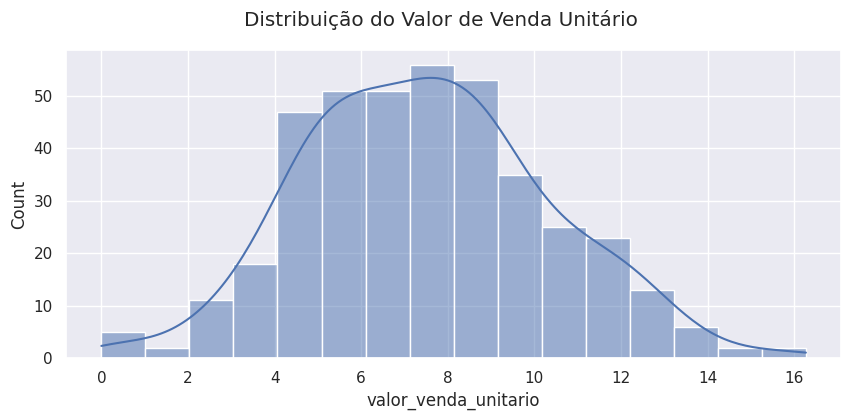

In [7]:
# Plot de valor_venda_unitario
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição do Valor de Venda Unitário')
sns.histplot(df_dsa['valor_venda_unitario'], kde = True)

<Axes: xlabel='valor_venda_total', ylabel='Count'>

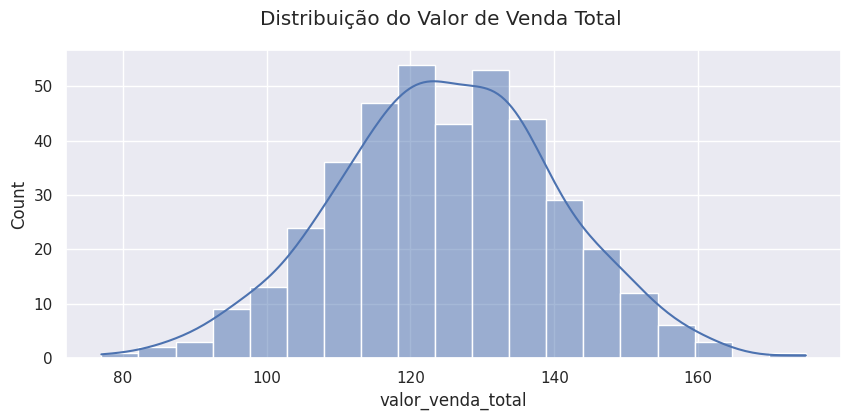

In [8]:
# Plot de valor_venda_total
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição do Valor de Venda Total')
sns.histplot(df_dsa['valor_venda_total'], kde = True)

<Axes: xlabel='custo_entrega', ylabel='Count'>

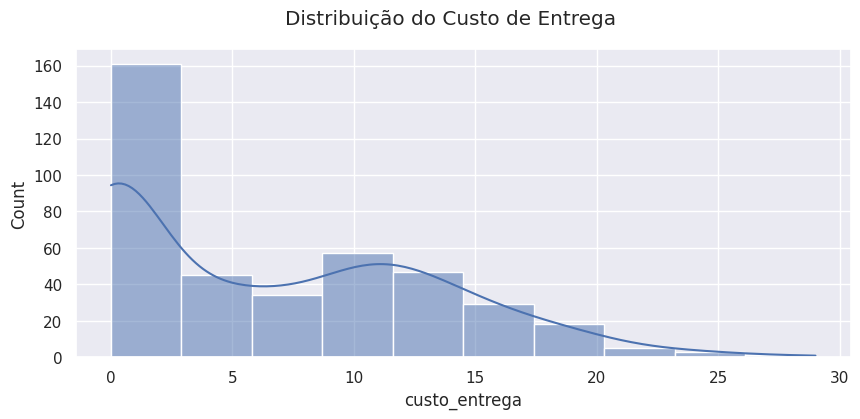

In [9]:
# Plot do custo de entrega
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição do Custo de Entrega')
sns.histplot(df_dsa['custo_entrega'], kde = True)

<Axes: xlabel='idade_vendedor', ylabel='Count'>

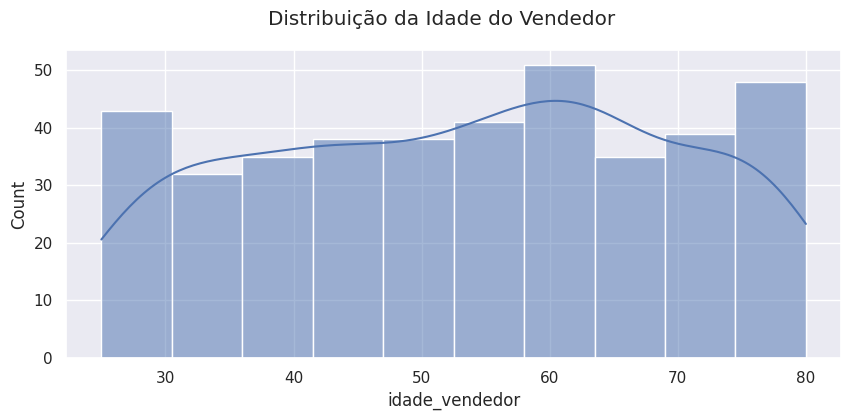

In [10]:
# Plot de idade do vendedor
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição da Idade do Vendedor')
sns.histplot(df_dsa['idade_vendedor'], kde = True)

In [11]:
# Configuração de estilo
sns.set(style = 'whitegrid')

In [12]:
# Tabela de frequência
df_dsa['status_entrega'].value_counts()

,count
status_entrega,
Medio,219
Ruim,96
Bom,85


<Axes: xlabel='status_entrega', ylabel='count'>

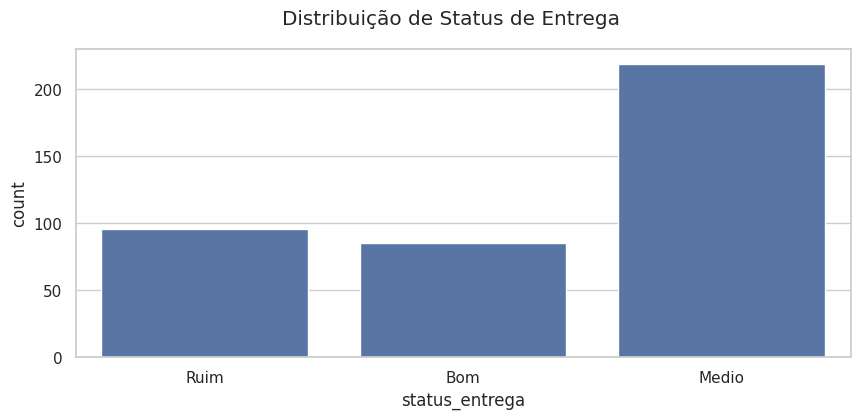

In [13]:
# Plot de status_entrega
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição de Status de Entrega')
sns.countplot(data = df_dsa, x = 'status_entrega')

In [14]:
# Tabela de frequência
df_dsa['area_urbana'].value_counts()

,count
area_urbana,
Sim,282
Nao,118


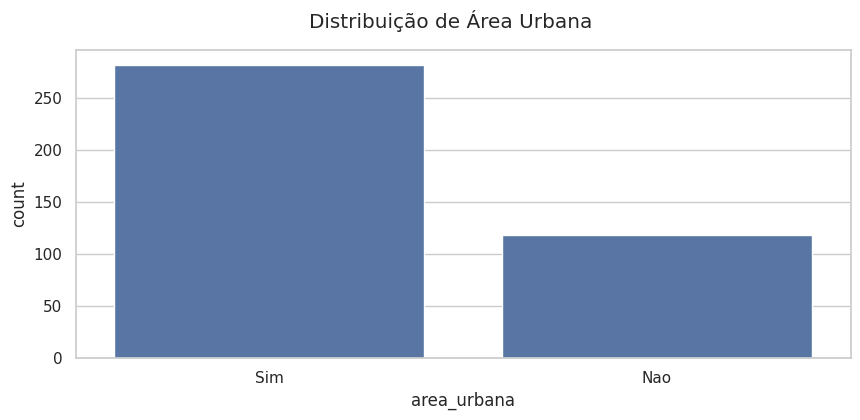

In [15]:
# Plot de area_urbana
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição de Área Urbana')
sns.countplot(data = df_dsa, x = 'area_urbana');

In [16]:
# Tabela de frequência
df_dsa['cliente_local'].value_counts()

,count
cliente_local,
Sim,258
Nao,142


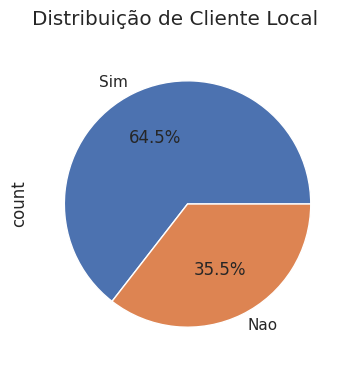

In [17]:
# Plot de cliente_local
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição de Cliente Local')
df_dsa['cliente_local'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

Criando e analisando tabela de frequência em Python

In [18]:
# Cria a tabela de frequência
freq_status_entrega = df_dsa['status_entrega'].value_counts()
print(freq_status_entrega)

status_entrega
Medio    219
Ruim      96
Bom       85
Name: count, dtype: int64


In [19]:
# Cria a tabela de frequência
freq_area_urbana = df_dsa['area_urbana'].value_counts()
print(freq_area_urbana)

area_urbana
Sim    282
Nao    118
Name: count, dtype: int64


Criando e analisando tabela de contingência em Python

A tabela de contingência é uma matriz que organiza dados categóricos em linhas e colunas, permitindo analisar a relação entre duas ou mais variáveis. Ela exibe frequências absolutas ou relativas, facilitando a identificação de padrões e associações.

In [20]:
# Cria a tabela de contingência
conting_status_area = pd.crosstab(df_dsa['status_entrega'], df_dsa['area_urbana'])
print(conting_status_area)

area_urbana     Nao  Sim
status_entrega          
Bom              28   57
Medio            68  151
Ruim             22   74


In [21]:
# Cria a tabela de contingência
conting_status_cliente = pd.crosstab(df_dsa['status_entrega'], df_dsa['cliente_local'])
print(conting_status_cliente)

cliente_local   Nao  Sim
status_entrega          
Bom              24   61
Medio            84  135
Ruim             34   62


In [22]:
# Criando uma tabela de contingência com três variáveis
contingency_3d = pd.crosstab(index = [df_dsa['status_entrega'], df_dsa['area_urbana']],
                             columns = df_dsa['cliente_local'],
                             margins = True,
                             margins_name = "Total")
print(contingency_3d)

cliente_local               Nao  Sim  Total
status_entrega area_urbana                 
Bom            Nao            6   22     28
               Sim           18   39     57
Medio          Nao           29   39     68
               Sim           55   96    151
Ruim           Nao           11   11     22
               Sim           23   51     74
Total                       142  258    400


Estratégia 1 de Tratamento de Variáveis Categóricas - One-Hot Enconding

In [23]:
# Selecionando as variáveis independentes (X) e a dependente (y)
X = df_dsa.drop('custo_entrega', axis = 1)
y = df_dsa['custo_entrega']

In [24]:
# Separa as variáveis categóricas e numéricas, pois terão processamentos diferentes
categorical_features = ['status_entrega', 'area_urbana', 'cliente_local']
numerical_features = ['valor_venda_unitario', 'valor_venda_total', 'idade_vendedor']

In [25]:
# Cria o transformador para variáveis categóricas
categorical_transformer = OneHotEncoder(drop = 'first') # o "drop = 'first'" deleta a primeira coluna

In [26]:
# Cria o transformador para variáveis numéricas
numerical_transformer = StandardScaler()

In [27]:
# Combinando os transformadores
# Pré-processamento: Codificação One-Hot para variáveis categóricas e padronização para numéricas
preprocessor_v1 = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [28]:
# Criando o pipeline com o processamento e com o modelo
modelo_dsa_v1 = Pipeline(steps = [('preprocessor', preprocessor_v1), ('regressor', LinearRegression())])

Impacto da estratégia 1 na modelagem preditiva

In [29]:
# Dividindo os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
# Fit somente com dados de treino
modelo_dsa_v1.fit(X_treino, y_treino)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['valor_venda_unitario',
                                                   'valor_venda_total',
                                                   'idade_vendedor']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['status_entrega',
                                                   'area_urbana',
                                                   'cliente_local'])])),
                ('regressor', LinearRegression())])

In [31]:
# Usamos predict nos dados de teste
y_pred = modelo_dsa_v1.predict(X_teste)

In [32]:
# Avaliando o modelo
mse_v1 = mean_squared_error(y_teste, y_pred)
rmse_v1 = mse_v1 ** 0.5
r2_v1 = r2_score(y_teste, y_pred) # Explica quanto as variáveis preditoras explicam a variável alvo

In [33]:
print(rmse_v1)
print(r2_v1)

5.099017184556865
0.42181922803831917


Estratégia 2 de Tratamento de Variáveis Categóricas - Ordinal Label Encoding

Ideal para variáveis qualitativas ordinais

In [34]:
# Separa as variáveis categóricas (nominais e ordinais) e numéricas, pois terão processamentos diferentes
categorical_features_nominal = ['area_urbana', 'cliente_local']
categorical_features_ordinal = ['status_entrega']
numerical_features = ['valor_venda_unitario', 'valor_venda_total', 'idade_vendedor']

In [35]:
# Definindo a ordem para as categorias (caso queira especificar a hierarquia exata das categorias)
# categorias = [['Ruim', 'Medio', 'Bom']]

In [36]:
# Transformador para as variáveis categóricas ordinais (caso queira especificar a hierarquia exata das categorias)
# categorical_transformer_ordinal = OrdinalEncoder(categories=categorias)

In [37]:
# Transformador para as variáveis categóricas ordinais
categorical_transformer_ordinal = OrdinalEncoder()

In [38]:
# Transformador para as variáveis categóricas nominais
categorical_transformer_nominal = OneHotEncoder(drop = 'first')

In [39]:
# Cria o transformador para variáveis numéricas
numerical_transformer = StandardScaler()

In [40]:
# Combinando os transformadores
preprocessor_v2 = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat_nominal', categorical_transformer_nominal, categorical_features_nominal),
        ('cat_ordinal', categorical_transformer_ordinal, categorical_features_ordinal)
    ]
)

In [41]:
# Pipeline
modelo_dsa_v2 = Pipeline(steps = [('preprocessor', preprocessor_v2), ('regressor', LinearRegression())])

Impacto da Estratégia 2 na Modelagem Preditiva

In [42]:
# Fit do modelo com dados de treino
modelo_dsa_v2.fit(X_treino, y_treino)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['valor_venda_unitario',
                                                   'valor_venda_total',
                                                   'idade_vendedor']),
                                                 ('cat_nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['area_urbana',
                                                   'cliente_local']),
                                                 ('cat_ordinal',
                                                  OrdinalEncoder(),
                                                  ['status_entrega'])])),
                ('regressor', LinearRegression())])

In [43]:
# Previsões com dados de teste
y_pred_v2 = modelo_dsa_v2.predict(X_teste)

In [44]:
# Avaliando o modelo atualizado
mse_v2 = mean_squared_error(y_teste, y_pred_v2)
rmse_v2 = mse_v2 ** 0.5
r2_v2 = r2_score(y_teste, y_pred_v2)

In [45]:
print(rmse_v2)

5.123545938744094


In [46]:
print(r2_v2)

0.41624318669246596


Interpretando a relação das variáveis preditoras com a variável alvo

In [47]:
# Para extrair os coeficientes, precisamos acessar o regressor dentro do pipeline
model_regressor = modelo_dsa_v1.named_steps['regressor']

In [48]:
# Tratar a transformação One-Hot para obter os nomes das variáveis
atrib_cat = modelo_dsa_v1.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
print(atrib_cat)

['status_entrega_Medio' 'status_entrega_Ruim' 'area_urbana_Sim'
 'cliente_local_Sim']


In [49]:
# Combinando os nomes das variáveis numéricas e categóricas transformadas
nomes_todos_atributos = numerical_features + list(atrib_cat)
print(nomes_todos_atributos)

['valor_venda_unitario', 'valor_venda_total', 'idade_vendedor', 'status_entrega_Medio', 'status_entrega_Ruim', 'area_urbana_Sim', 'cliente_local_Sim']


In [50]:
# Coeficiente do modelo
coeficientes = model_regressor.coef_
print(coeficientes)

[ 1.5759904  -0.17500897  0.36883283  1.33280247  1.70116209 -0.36918643
  9.04891871]


In [51]:
# Criando um DataFrame para melhor visualização
dsa_coef_df = pd.DataFrame({'Atributo': nomes_todos_atributos, 'Coeficiente': coeficientes})

In [52]:
# Ordenando os coeficientes por magnitude (valor absoluto)
dsa_coef_df = dsa_coef_df.reindex(dsa_coef_df.Coeficiente.abs().sort_values(ascending=False).index)

In [53]:
dsa_coef_df

,Atributo,Coeficiente
6,cliente_local_Sim,9.048919
4,status_entrega_Ruim,1.701162
0,valor_venda_unitario,1.575990
3,status_entrega_Medio,1.332802
5,area_urbana_Sim,-0.369186
2,idade_vendedor,0.368833
1,valor_venda_total,-0.175009
